## Import Essential Libraries and Load in Data

In [1]:
# Import Essential Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# # CIK list of 50 Bloomberg firms that have the largest stashes abroad
# cik_list = [320193,789019,858877,1652044,1341439,200406,40545,318154,882095,804328,21344,77476,50863,80424,1018724,1403161,
# 14272,18230,1326801,816284,38777,64670,104169,1666700,6281,320187,1045810,106040,875045,707549,1002047,1141391,
# 796343,6951,1058290,849399,24741,1701605,1000697,743988,712515,310764,1035002,49826,1090872,1090727,
# 877890,66740,718877]

In [3]:
# Read in Data
df = pd.read_csv('bloomberg_50_firms.csv')

In [4]:
# Select only the relevant columns
df = df.copy().loc[:,['cik+fy','sic','Assets','PropertyPlantAndEquipmentNet','UndistributedEarningsOfForeignSubsidiaries',
                     'IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordinaryItemsNoncontrollingInterest',
                     'IncomeLossFromContinuingOperationsBeforeIncomeTaxesForeign',
                     'IncomeLossFromContinuingOperationsBeforeIncomeTaxesDomestic',
                     'ResearchAndDevelopmentExpense', 'Liabilities', 'GrossProfit']]

In [5]:
value_columns = ['Assets', 'PropertyPlantAndEquipmentNet',
       'UndistributedEarningsOfForeignSubsidiaries',
       'IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordinaryItemsNoncontrollingInterest',
       'IncomeLossFromContinuingOperationsBeforeIncomeTaxesForeign',
       'IncomeLossFromContinuingOperationsBeforeIncomeTaxesDomestic',
       'ResearchAndDevelopmentExpense', 'Liabilities', 'GrossProfit']

In [6]:
# Check for missing values and if there are, how many they are missing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 11 columns):
cik+fy                                                                                         443 non-null object
sic                                                                                            354 non-null float64
Assets                                                                                         443 non-null float64
PropertyPlantAndEquipmentNet                                                                   443 non-null float64
UndistributedEarningsOfForeignSubsidiaries                                                     418 non-null float64
IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordinaryItemsNoncontrollingInterest    443 non-null float64
IncomeLossFromContinuingOperationsBeforeIncomeTaxesForeign                                     443 non-null float64
IncomeLossFromContinuingOperationsBeforeIncomeTaxesDomestic                         

In [7]:
# Split the cik+fy column into cik and fy columns
df['cik'], df['fy'] = df['cik+fy'].str.split('_').str

In [8]:
# Fill in missing SIC values
df.sic = df.groupby('cik').sic.ffill()
df.sic = df.groupby('cik').sic.bfill()

In [9]:
df.head()

,cik+fy,sic,Assets,PropertyPlantAndEquipmentNet,UndistributedEarningsOfForeignSubsidiaries,IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordinaryItemsNoncontrollingInterest,IncomeLossFromContinuingOperationsBeforeIncomeTaxesForeign,IncomeLossFromContinuingOperationsBeforeIncomeTaxesDomestic,ResearchAndDevelopmentExpense,Liabilities,GrossProfit,cik,fy
0,6281_2009,3674.0,3.404294e+09,4.765160e+08,1.851000e+09,2.974440e+08,296311000.0,1133000.0,446980000.0,8.751450e+08,1.118637e+09,6281,2009
1,6281_2010,3674.0,4.328831e+09,4.726650e+08,2.327000e+09,5.860590e+08,296311000.0,289748000.0,492305000.0,1.129114e+09,1.799422e+09,6281,2010
2,6281_2011,3674.0,5.277635e+09,2.136901e+09,2.805000e+09,1.061447e+09,705628000.0,355819000.0,505570000.0,1.482222e+09,1.986541e+09,6281,2011
3,6281_2012,3674.0,5.620347e+09,2.228151e+09,3.221000e+09,8.135330e+08,580055000.0,233478000.0,512003000.0,1.454988e+09,1.741001e+09,6281,2012
4,6281_2013,3674.0,6.381750e+09,5.081710e+08,3.761600e+09,8.153230e+08,690586000.0,124737000.0,513255000.0,1.642174e+09,1.692411e+09,6281,2013


In [10]:
df.tail()

,cik+fy,sic,Assets,PropertyPlantAndEquipmentNet,UndistributedEarningsOfForeignSubsidiaries,IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordinaryItemsNoncontrollingInterest,IncomeLossFromContinuingOperationsBeforeIncomeTaxesForeign,IncomeLossFromContinuingOperationsBeforeIncomeTaxesDomestic,ResearchAndDevelopmentExpense,Liabilities,GrossProfit,cik,fy
442,318154_2017,2836.0,7.995400e+10,4.989000e+09,0.0,9.597000e+09,5.161000e+09,4.436000e+09,3.562000e+09,5.471300e+10,1.979000e+09,318154,2017
443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Dropping rows with all missing values (useless rows that have been created for no reason)
df.dropna(how='all',inplace=True)

In [12]:
df[df.sic.isnull()]

,cik+fy,sic,Assets,PropertyPlantAndEquipmentNet,UndistributedEarningsOfForeignSubsidiaries,IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordinaryItemsNoncontrollingInterest,IncomeLossFromContinuingOperationsBeforeIncomeTaxesForeign,IncomeLossFromContinuingOperationsBeforeIncomeTaxesDomestic,ResearchAndDevelopmentExpense,Liabilities,GrossProfit,cik,fy
416,30554_2009,NaN,3.818500e+10,2.891500e+10,1.129700e+10,2.184000e+09,2.013000e+09,1.710000e+08,1.378000e+09,3.053400e+10,6.401000e+09,30554,2009
417,30554_2010,NaN,4.041000e+10,2.996700e+10,1.263100e+10,3.711000e+09,2.762000e+09,9.490000e+08,1.603000e+09,3.066700e+10,8.359000e+09,30554,2010
418,30554_2011,NaN,4.849200e+10,3.276100e+10,1.335000e+10,3.879000e+09,3.161000e+09,7.180000e+08,1.910000e+09,3.943000e+10,1.241700e+10,30554,2011
419,30554_2012,NaN,4.973600e+10,3.182600e+10,1.317900e+10,3.088000e+09,2.448000e+09,6.400000e+08,2.067000e+09,3.955700e+10,1.327400e+10,30554,2012
420,30554_2013,NaN,5.149900e+10,1.299300e+10,1.597800e+10,3.489000e+09,2.527000e+09,9.620000e+08,2.153000e+09,3.521300e+10,1.318600e+10,30554,2013
421,30554_2014,NaN,4.987600e+10,1.338600e+10,1.722600e+10,4.313000e+09,1.776000e+09,2.537000e+09,1.958000e+09,3.649800e+10,1.138300e+10,30554,2014
422,30554_2015,NaN,4.116600e+10,9.784000e+09,1.605300e+10,2.591000e+09,1.194000e+09,1.397000e+09,1.898000e+09,3.096600e+10,1.001800e+10,30554,2015
423,30554_2016,NaN,8.851000e+09,8.851000e+09,1.738000e+10,3.265000e+09,1.808000e+09,1.457000e+09,1.641000e+09,2.976800e+10,1.012500e+10,30554,2016
424,30554_2017,NaN,1.129640e+11,1.243500e+10,1.540800e+10,1.791000e+09,1.382000e+09,4.090000e+08,4.730000e+08,3.803200e+10,1.207000e+10,30554,2017
425,808362_2009,NaN,1.143900e+10,3.161000e+09,2.300000e+09,6.110000e+08,6.290000e+08,-1.800000e+07,3.970000e+08,4.155000e+09,2.267000e+09,808362,2009


In [13]:
df_sic_isnull = df.copy()[df.copy().sic.isnull()]

In [14]:
df_sic_isnull['new_sic'] = pd.Series([2820,2820,2820,2820,2820,2820,2820,2820,2820,3533,3533,3533,3533,3533,3533,3533,3533,3533]).ravel()

In [16]:
del df_sic_isnull['sic']
df_sic_isnull = df_sic_isnull.rename(columns={'new_sic':'sic'})

In [18]:
df = pd.concat([df.copy()[df.copy().sic.notnull()], df_sic_isnull])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 0 to 433
Data columns (total 13 columns):
Assets                                                                                         443 non-null float64
GrossProfit                                                                                    443 non-null float64
IncomeLossFromContinuingOperationsBeforeIncomeTaxesDomestic                                    443 non-null float64
IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordinaryItemsNoncontrollingInterest    443 non-null float64
IncomeLossFromContinuingOperationsBeforeIncomeTaxesForeign                                     443 non-null float64
Liabilities                                                                                    443 non-null float64
PropertyPlantAndEquipmentNet                                                                   443 non-null float64
ResearchAndDevelopmentExpense                                                      

## Analysis

###### Summary Stats

In [20]:
# Summary Stats
df.describe().iloc[:,1:]

,GrossProfit,IncomeLossFromContinuingOperationsBeforeIncomeTaxesDomestic,IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordinaryItemsNoncontrollingInterest,IncomeLossFromContinuingOperationsBeforeIncomeTaxesForeign,Liabilities,PropertyPlantAndEquipmentNet,ResearchAndDevelopmentExpense,UndistributedEarningsOfForeignSubsidiaries,sic
count,4.430000e+02,4.430000e+02,4.430000e+02,4.430000e+02,4.430000e+02,4.430000e+02,3.730000e+02,4.180000e+02,443.000000
mean,1.286937e+10,2.844037e+09,6.348588e+09,3.511648e+09,3.187978e+10,1.013966e+10,2.739761e+09,1.550398e+10,4438.309255
std,2.082654e+10,4.297315e+09,9.115957e+09,5.721968e+09,6.401190e+10,1.870542e+10,3.279830e+09,2.220485e+10,1798.039071
min,-3.240000e+08,-1.723400e+10,-1.263300e+10,-1.824000e+09,1.670000e+08,1.380000e+08,-2.253600e+09,0.000000e+00,2080.000000
25%,2.352032e+09,2.241170e+08,1.017805e+09,6.378130e+08,4.168345e+09,8.110000e+08,6.680000e+08,2.900000e+09,3021.000000
50%,4.242000e+09,1.452268e+09,3.182000e+09,1.424000e+09,1.085200e+10,2.851000e+09,1.415000e+09,6.300000e+09,3674.000000
75%,1.181400e+10,3.817000e+09,8.165000e+09,4.186000e+09,3.782300e+10,1.287950e+10,3.731000e+09,1.837500e+10,6282.000000
max,1.223650e+11,2.491500e+10,7.251500e+10,4.760000e+10,5.773600e+11,1.153640e+11,2.262000e+10,1.420000e+11,7389.000000


###### Industry Distribution

In [21]:
# Giving industry classification to 50 bloomberg companies
df['industry']=\
pd.cut(df.sic.tolist(),[1000,1999,3999,4999,5999,6999,8999,9999],include_lowest=True,
             labels=['Mining and Construction','Manufacturing','Transportation, Communication, Electric, Gas',
               'Wholesale, Retail','Financial, Insurance, Real Estate','Services','Public Administration'])

In [22]:
industry_distribution_df =\
pd.concat([df.industry.value_counts().to_frame(), pd.DataFrame(df.industry.value_counts()*100 / df.industry.value_counts().sum())],axis=1)
industry_distribution_df.columns=['industry','proportion in percentage']
industry_distribution_df

,industry,proportion in percentage
Manufacturing,302,68.171558
Services,105,23.702032
"Wholesale, Retail",18,4.063205
"Financial, Insurance, Real Estate",9,2.031603
"Transportation, Communication, Electric, Gas",9,2.031603
Public Administration,0,0.000000
Mining and Construction,0,0.000000


##### Making Sure we have Equal Number of companies throughout the fiscal years

In [23]:
df.groupby('fy').count().iloc[:,0].to_frame().rename(columns={'Assets':'Count'})

,Count
fy,
2009,48
2010,49
2011,49
2012,50
2013,50
2014,50
2015,49
2016,49
2017,49


In [24]:
# Only keep the companies that have data for all years 2009 to 2017
df_has_data_for_all_years = df.groupby('cik').filter(lambda x: len(x['fy'])==9)
df_has_data_for_all_years.groupby('fy').count().iloc[:,0].to_frame().rename(columns={'Assets':'Count'})

,Count
fy,
2009,45
2010,45
2011,45
2012,45
2013,45
2014,45
2015,45
2016,45
2017,45


In [25]:
df.cik.nunique()

49

In [26]:
# Companies that were dropped because they didn't have data for all years
df[~df.cik.isin(df_has_data_for_all_years.cik.unique().tolist())].cik.unique().tolist()

['64670', '80424', '318154', '1326801']

###### Overall Mean & Sum of different Fields (e.g. Assets, Foreign Income etc. ) over time 

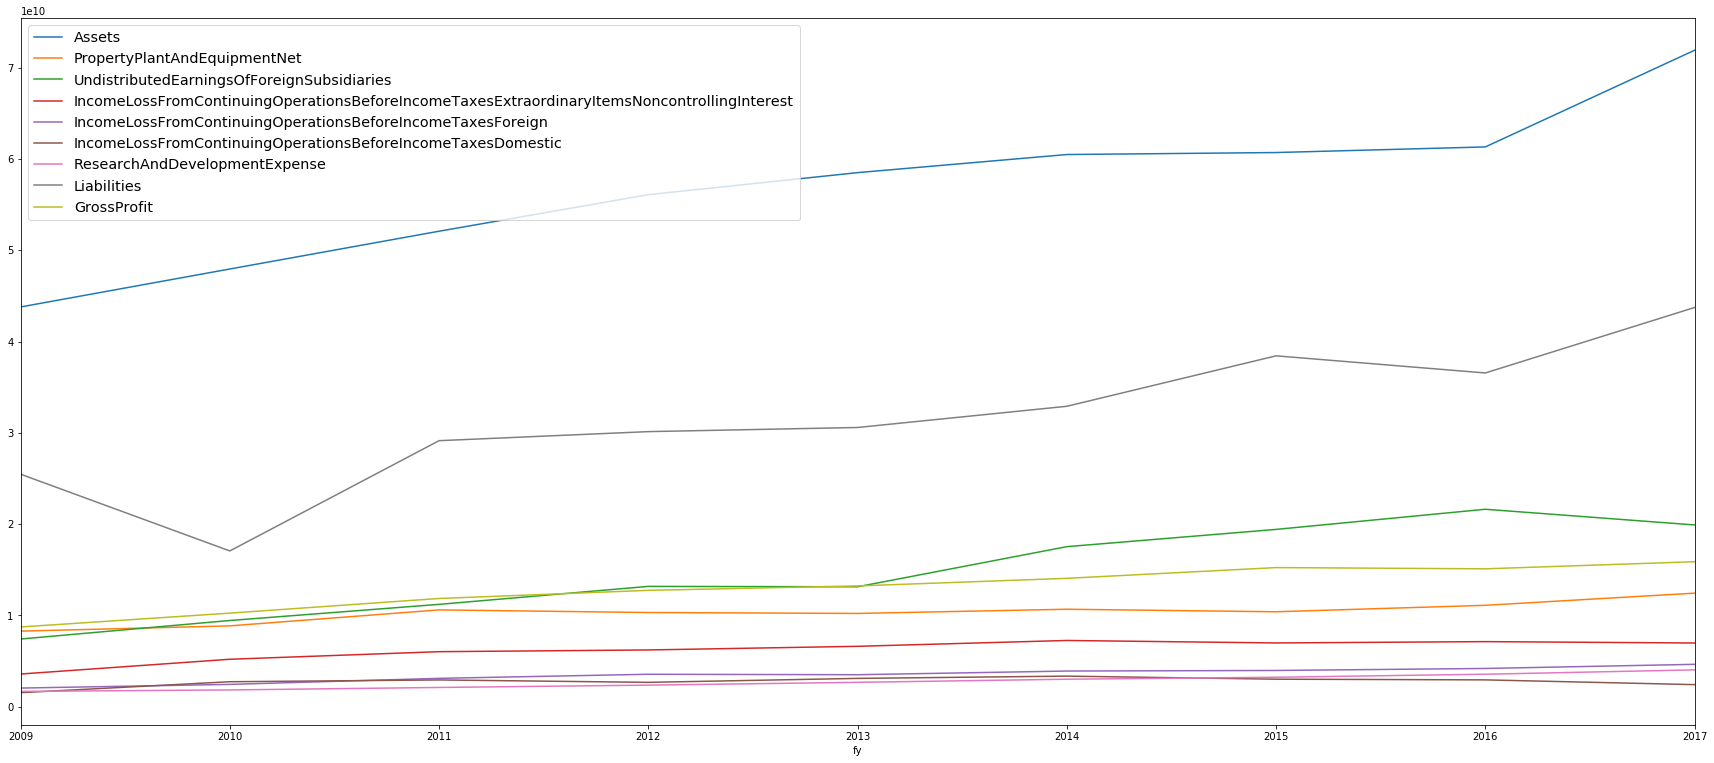

In [25]:
# Mean
df_has_data_for_all_years.groupby('fy').mean().loc[:,value_columns].plot(figsize=(30,13))
plt.legend(fontsize ='x-large')

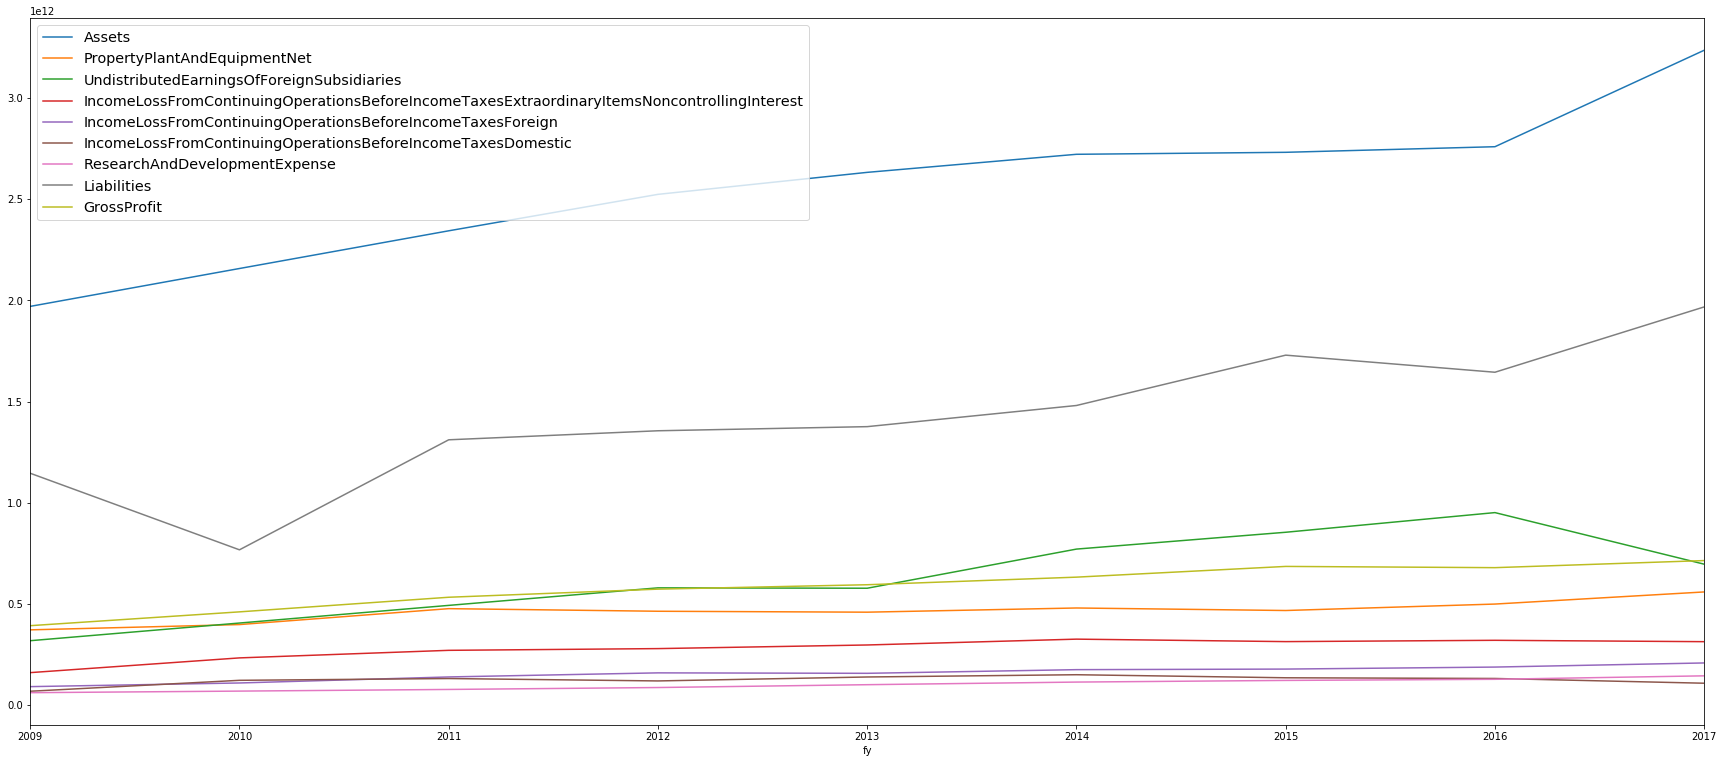

In [26]:
# Sum
df_has_data_for_all_years.groupby('fy').sum().loc[:,value_columns].plot(figsize=(30,13))
plt.legend(fontsize ='x-large')

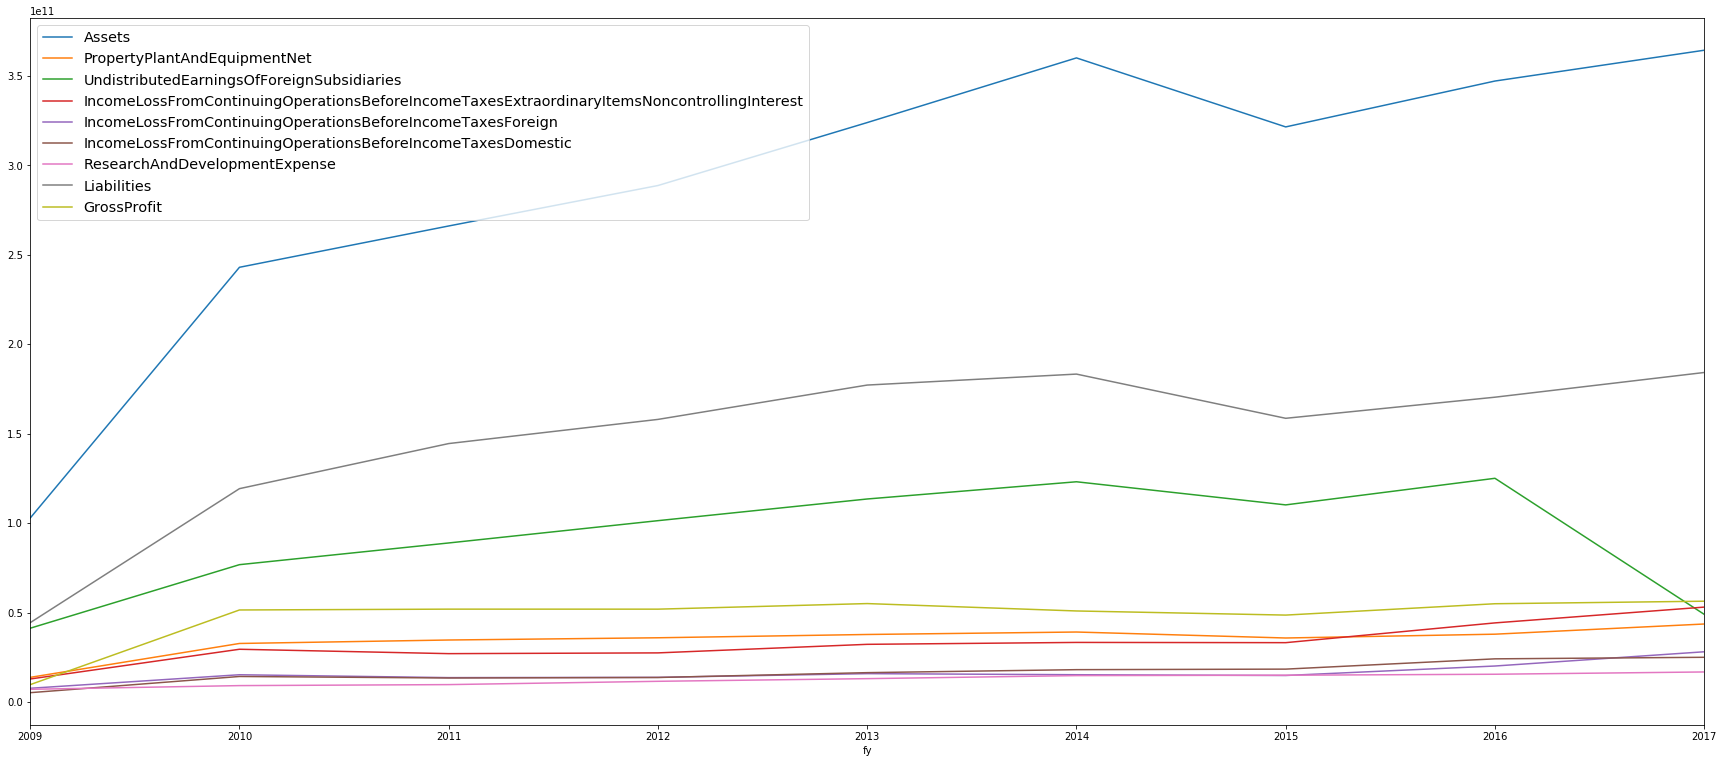

In [28]:
# 4 companies that have been dropped because they don't have data for all years
df[df.cik.isin(df[~df.cik.isin(df_has_data_for_all_years.cik.unique().tolist())].cik.unique().tolist())]\
.groupby('fy').sum().loc[:,value_columns].plot(figsize=(30,13))
plt.legend(fontsize ='x-large')

###### Assets

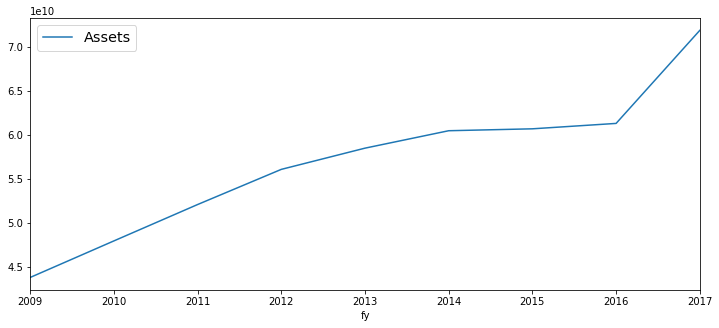

In [37]:
df_has_data_for_all_years.groupby('fy').mean().loc[:,value_columns].iloc[:,0].plot(figsize=(12,5))
plt.legend(fontsize ='x-large')

##### Property Plant and Equipment

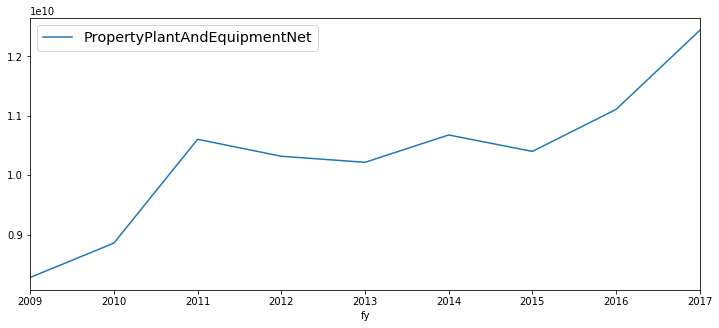

In [36]:
# Mean
df_has_data_for_all_years.groupby('fy').mean().loc[:,value_columns].iloc[:,1].plot(figsize=(12,5))
plt.legend(fontsize ='x-large')

###### Undistributed Foreign Earnings (UFE)

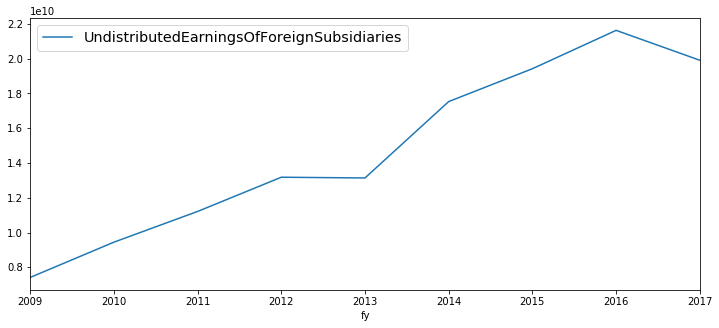

In [38]:
# Mean
df_has_data_for_all_years.groupby('fy').mean().loc[:,value_columns].iloc[:,2].plot(figsize=(12,5))
plt.legend(fontsize ='x-large')

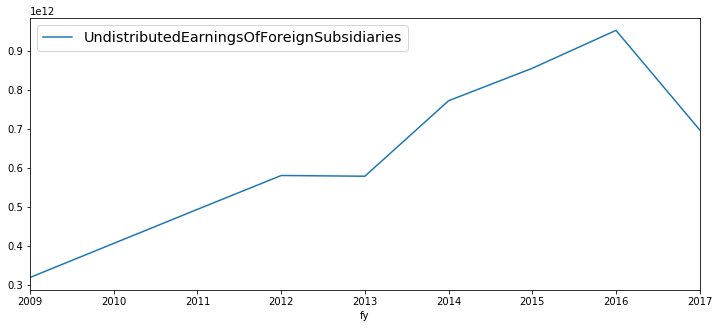

In [39]:
# Sum
df_has_data_for_all_years.groupby('fy').sum().loc[:,value_columns].iloc[:,2].plot(figsize=(12,5))
plt.legend(fontsize ='x-large')

##### Total Income

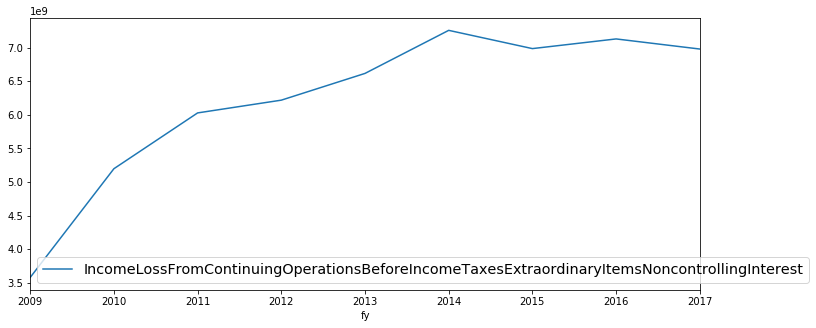

In [52]:
# Mean
df_has_data_for_all_years.groupby('fy').mean().loc[:,value_columns].iloc[:,3].plot(figsize=(12,5))
plt.legend(fontsize ='x-large')

##### Foreign Income

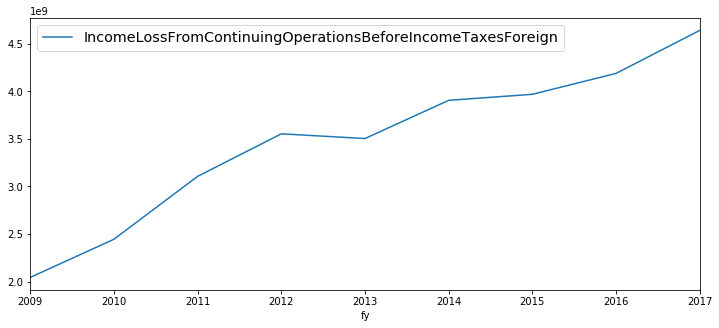

In [41]:
# Mean
df_has_data_for_all_years.groupby('fy').mean().loc[:,value_columns].iloc[:,4].plot(figsize=(12,5))
plt.legend(fontsize ='x-large')

###### Domestic Income

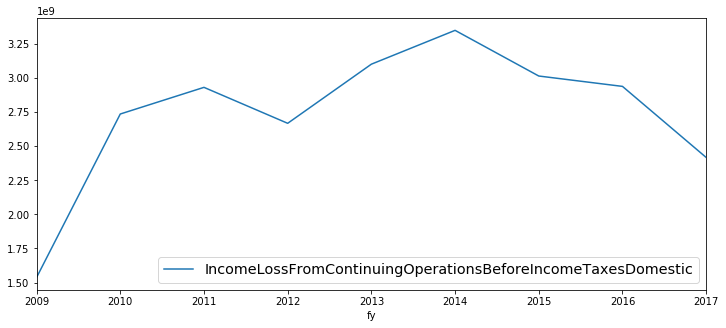

In [42]:
# Mean
df_has_data_for_all_years.groupby('fy').mean().loc[:,value_columns].iloc[:,5].plot(figsize=(12,5))
plt.legend(fontsize ='x-large')

###### R&D

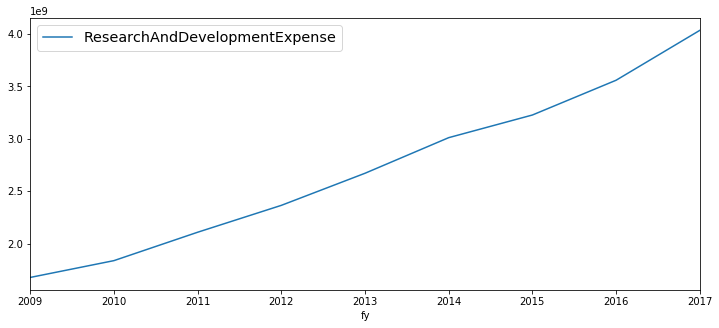

In [43]:
# Mean
df_has_data_for_all_years.groupby('fy').mean().loc[:,value_columns].iloc[:,6].plot(figsize=(12,5))
plt.legend(fontsize ='x-large')

###### Liabilities

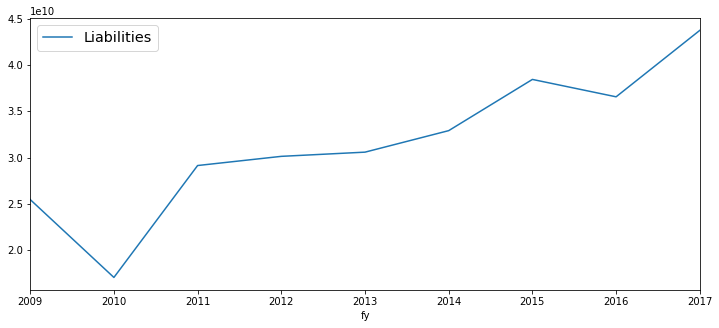

In [44]:
# Mean
df_has_data_for_all_years.groupby('fy').mean().loc[:,value_columns].iloc[:,7].plot(figsize=(12,5))
plt.legend(fontsize ='x-large')

###### Gross Profit

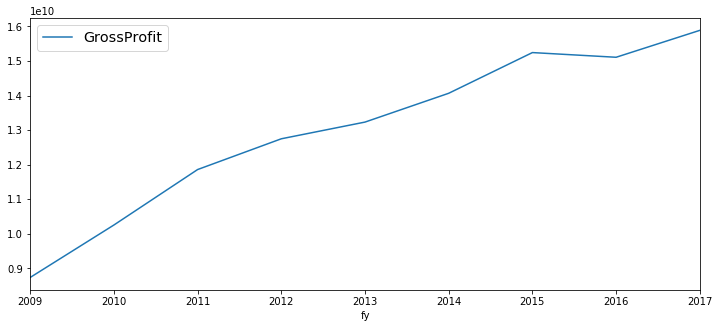

In [45]:
# Mean
df_has_data_for_all_years.groupby('fy').mean().loc[:,value_columns].iloc[:,8].plot(figsize=(12,5))
plt.legend(fontsize ='x-large')